In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install pandas openpyxl xlrd

Note: you may need to restart the kernel to use updated packages.


In [2]:
df1 = pd.read_excel('nov-22.xlsx')
df2 = pd.read_excel('jul-22.xlsx')
df3 = pd.read_excel('feb-23.xlsx')

In [3]:
data = pd.concat([df1, df2, df3], axis=0, ignore_index=True)

In [4]:
data.head()

,co_id,activation_date,total_nb_recharge,total_rechage,total_u_data,total_rev_option,total_rev_sos,total_u_out,total_u_in,usage_op1,...,usage_op3,nb_cont_out,nb_cont_in,nb_cell_visite_out,nb_cell_visite_in,entity_code,entity_type_name,nbr_contrat,nbr_actif,flag_churn
0,39125204.0,2022-11-16 09:09:38,1.0,1.0,5.217651e+06,0.798319,NaN,79.817,3.300,NaN,...,7.400,15.0,6.0,5.0,6.0,TRA012,AGENCE TRADE,10.0,6.0,1.0
1,39117975.0,2022-11-16 12:13:31,1.0,5.0,5.916042e+04,3.781513,NaN,0.000,27.850,NaN,...,NaN,1.0,14.0,0.0,5.0,MON0104,AGENCE TRADE,4.0,2.0,0.0
2,40013993.0,2022-11-04 09:52:54,4.0,4.0,2.445030e+04,NaN,NaN,143.167,65.817,NaN,...,78.250,46.0,26.0,31.0,33.0,SOU0022F,FRANCHISE,2.0,2.0,0.0
3,38771650.0,2022-11-20 07:07:55,1.0,1.0,5.806141e+06,NaN,NaN,123.717,6.883,NaN,...,NaN,8.0,4.0,5.0,4.0,MON0104,AGENCE TRADE,15.0,3.0,0.0
4,38785077.0,2022-11-01 17:58:57,11.0,31.0,1.270596e+07,23.613445,NaN,119.084,129.667,NaN,...,55.117,19.0,23.0,12.0,22.0,MON0104,AGENCE TRADE,10.0,8.0,0.0


In [5]:
data.to_excel('donnees_combinees.xlsx', index=False)

# Analyse des données
## 1. Analyse univariée

### 1.1 Préparation des données 

In [5]:
#Vérification de la taille du dataset
data.shape

(708908, 21)

In [7]:
#Vérification des types de données et des valeurs manquantes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708908 entries, 0 to 708907
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   co_id               708907 non-null  float64
 1   activation_date     708907 non-null  object 
 2   total_nb_recharge   629555 non-null  float64
 3   total_rechage       629555 non-null  float64
 4   total_u_data        581693 non-null  float64
 5   total_rev_option    390189 non-null  float64
 6   total_rev_sos       1330 non-null    float64
 7   total_u_out         670271 non-null  float64
 8   total_u_in          491100 non-null  float64
 9   usage_op1           3261 non-null    float64
 10  usage_op2           42161 non-null   float64
 11  usage_op3           433353 non-null  float64
 12  nb_cont_out         665887 non-null  float64
 13  nb_cont_in          673766 non-null  float64
 14  nb_cell_visite_out  665887 non-null  float64
 15  nb_cell_visite_in   673766 non-nul

In [8]:
data_copy= data.copy(deep=True)

### 1.1.1. Identification des doublons 

In [9]:
#Vérification des doublons
data_copy.duplicated().sum()

np.int64(3)

In [10]:
#Suppression des doublons
data_copy.drop_duplicates(inplace=True)
print(f"Nombre de lignes après suppression des doublons : {data_copy.shape[0]}")

Nombre de lignes après suppression des doublons : 708905


### 1.1.2. Gestion des valeurs manquantes 

In [11]:
data_copy.isnull().sum()

co_id                      1
activation_date            1
total_nb_recharge      79353
total_rechage          79353
total_u_data          127214
total_rev_option      318717
total_rev_sos         707575
total_u_out            38637
total_u_in            217807
usage_op1             705644
usage_op2             666744
usage_op3             275555
nb_cont_out            43020
nb_cont_in             35141
nb_cell_visite_out     43020
nb_cell_visite_in      35141
entity_code            12679
entity_type_name       12679
nbr_contrat            11347
nbr_actif              11347
flag_churn                 1
dtype: int64

In [12]:
# Pourcentage de valeurs manquantes par colonne
missing_percentage = data_copy.isnull().mean() * 100
print(missing_percentage)

co_id                  0.000141
activation_date        0.000141
total_nb_recharge     11.193742
total_rechage         11.193742
total_u_data          17.945141
total_rev_option      44.959057
total_rev_sos         99.812387
total_u_out            5.450237
total_u_in            30.724427
usage_op1             99.539995
usage_op2             94.052659
usage_op3             38.870512
nb_cont_out            6.068514
nb_cont_in             4.957082
nb_cell_visite_out     6.068514
nb_cell_visite_in      4.957082
entity_code            1.788533
entity_type_name       1.788533
nbr_contrat            1.600638
nbr_actif              1.600638
flag_churn             0.000141
dtype: float64


In [13]:
#Suppression des colonnes avec plus de 90% de valeurs manquantes car elles apportent peu d'informations exploitables
data_copy.drop(["total_rev_sos","usage_op1","usage_op2"], axis=1, inplace=True)

In [14]:
#Suppression de la colonne co_id
data_copy.drop(columns=['co_id'], inplace=True)

In [15]:
#Remplissage des valeurs manquantes des colonnes catégoriques par le mode :
for col in ['entity_code', 'entity_type_name']:
    data_copy[col].fillna(data_copy[col].mode()[0], inplace=True)

C:\Users\Asma\AppData\Local\Temp\ipykernel_27572\3997339540.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_copy[col].fillna(data_copy[col].mode()[0], inplace=True)


In [16]:
# Suppression de la ligne avec NaN dans activation_date et flag_churn
data_copy.drop(data_copy[
                         (data_copy['activation_date'].isna()) & 
                         (data_copy['flag_churn'].isna())].index, inplace=True)


In [17]:
#Remplissages des variables continues par la moyenne :

# Liste des variables continues à remplacer par la moyenne
continuous_vars = ['total_rechage', 'total_u_data', 'total_rev_option', 'total_u_out', 'total_u_in', 'usage_op3']

# Remplacement des valeurs manquantes par la moyenne
for var in continuous_vars:
    data_copy[var].fillna(data_copy[var].mean(), inplace=True)


C:\Users\Asma\AppData\Local\Temp\ipykernel_27572\2507030622.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_copy[var].fillna(data_copy[var].mean(), inplace=True)


In [18]:
#Remplissage des variables discretes par la médiane : 

# Liste des variables discrètes à remplacer par la médiane
discrete_vars = ['total_nb_recharge', 'nbr_contrat', 'nbr_actif', 
                 'nb_cont_out', 'nb_cont_in', 'nb_cell_visite_out', 'nb_cell_visite_in']

# Remplacement des valeurs manquantes par la médiane
for var in discrete_vars:
    data_copy[var].fillna(data_copy[var].median(), inplace=True)


C:\Users\Asma\AppData\Local\Temp\ipykernel_27572\116716118.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_copy[var].fillna(data_copy[var].median(), inplace=True)
C:\Users\Asma\AppData\Local\Temp\ipykernel_27572\116716118.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [19]:
data_copy.isnull().sum()

activation_date       0
total_nb_recharge     0
total_rechage         0
total_u_data          0
total_rev_option      0
total_u_out           0
total_u_in            0
usage_op3             0
nb_cont_out           0
nb_cont_in            0
nb_cell_visite_out    0
nb_cell_visite_in     0
entity_code           0
entity_type_name      0
nbr_contrat           0
nbr_actif             0
flag_churn            0
dtype: int64

In [20]:
data_copy.shape

(708904, 17)

### 1.1.3. Gestion des valeurs aberrantes

In [21]:
# Conversion de la colonne 'activation_date' en type datetime
data_copy['activation_date'] = pd.to_datetime(data_copy['activation_date'], errors='coerce')

# Vérification du type après conversion
print(data_copy['activation_date'].dtype)


datetime64[ns]


In [22]:
data_copy['entity_code'].unique()

array(['TRA012', 'MON0104', 'SOU0022F', ..., 'TUN0402', 'TUNKRA10',
       'ZAG0033'], dtype=object)

In [23]:
data_copy['entity_type_name'].unique()

array(['AGENCE TRADE', 'FRANCHISE', 'INDIRECT', 'BOUTIQUE', 'LAB2.0',
       'TRAVEL RETAIL', 'CONVENTION RAYEN', 'PRO', 'AUTRES BOUTIQUES',
       'CONVENTION', 'AUTRES'], dtype=object)

Détection visuelle des outliers :

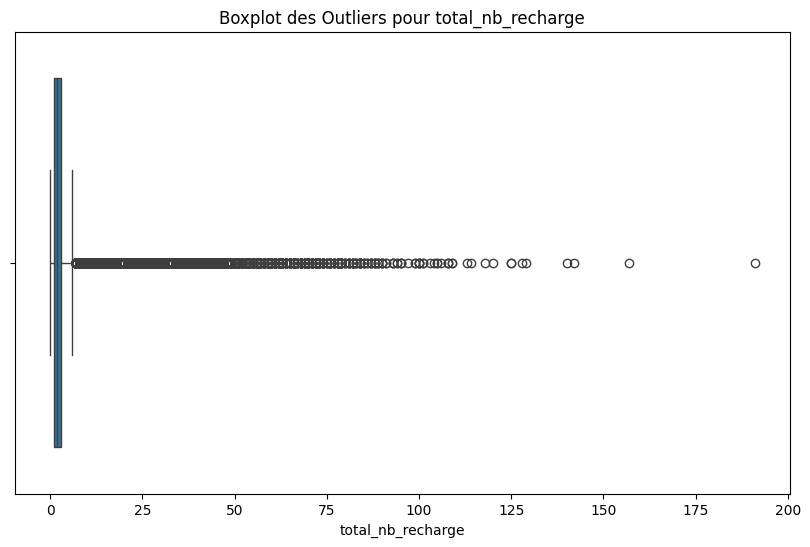

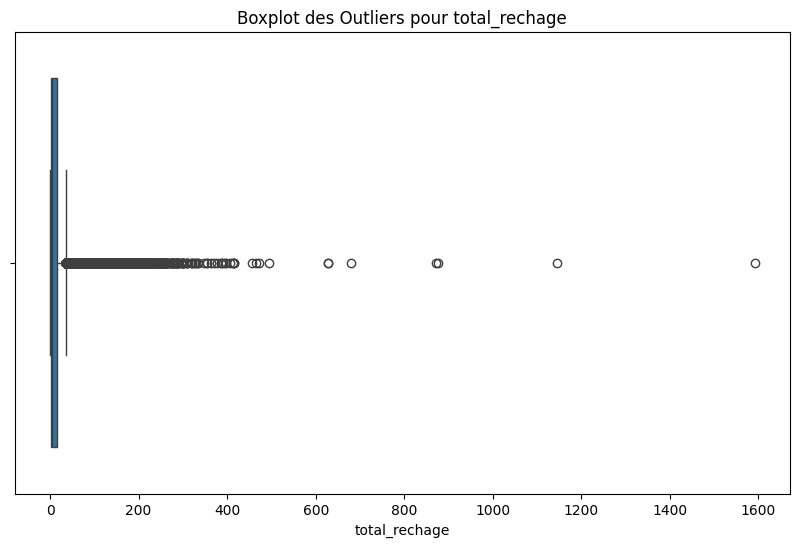

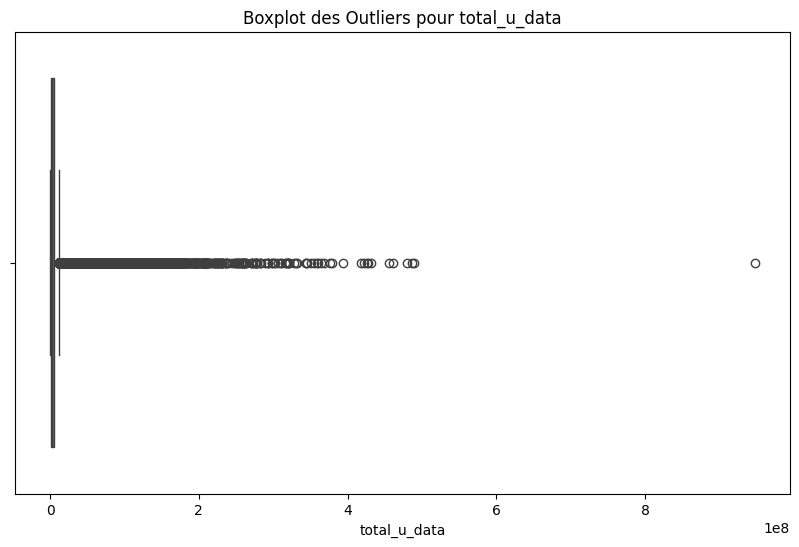

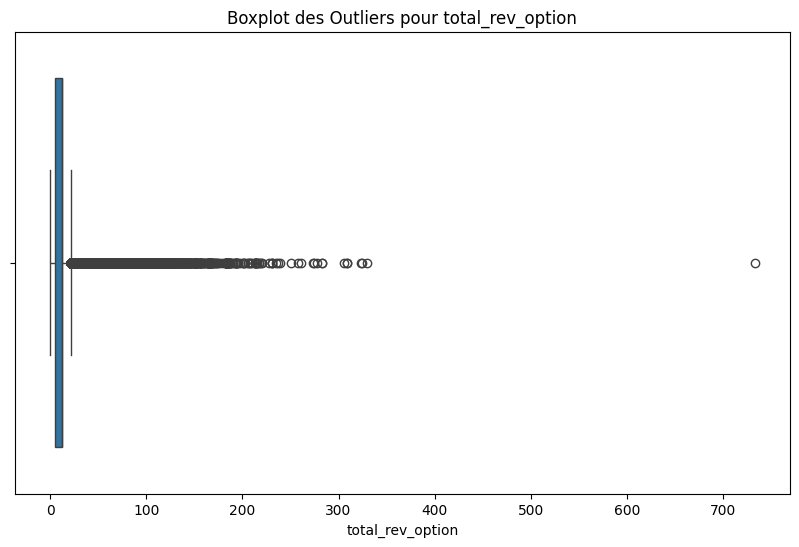

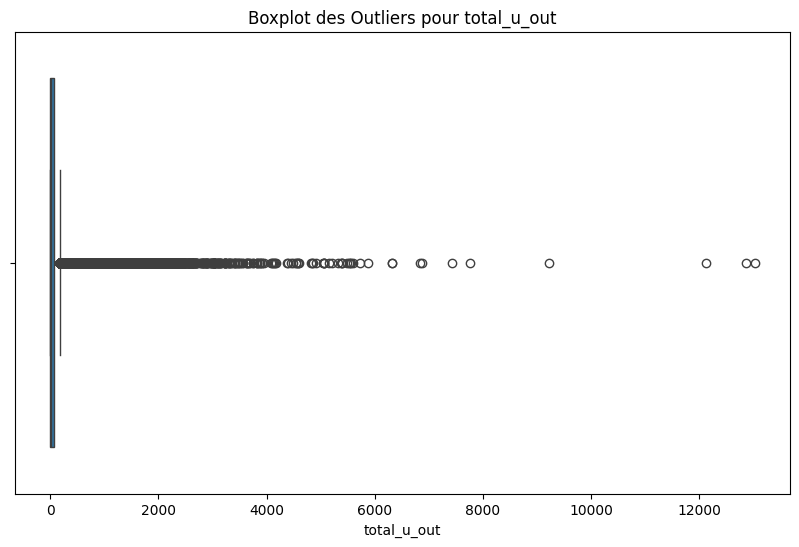

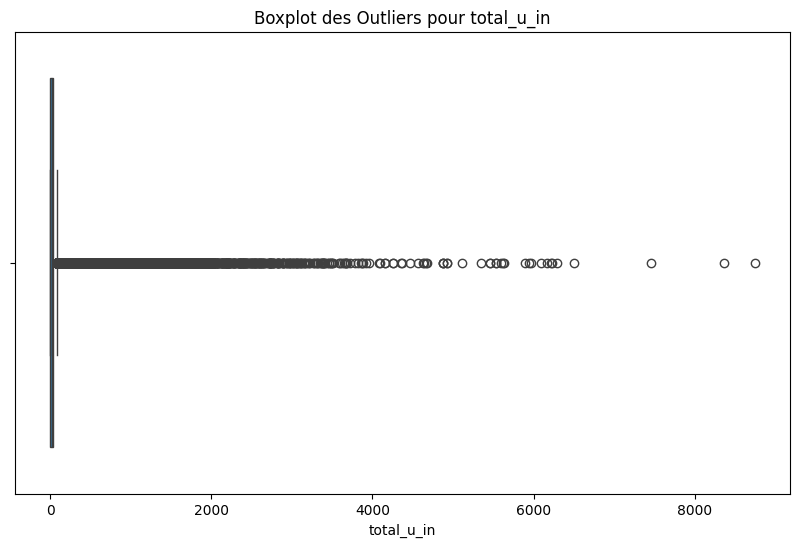

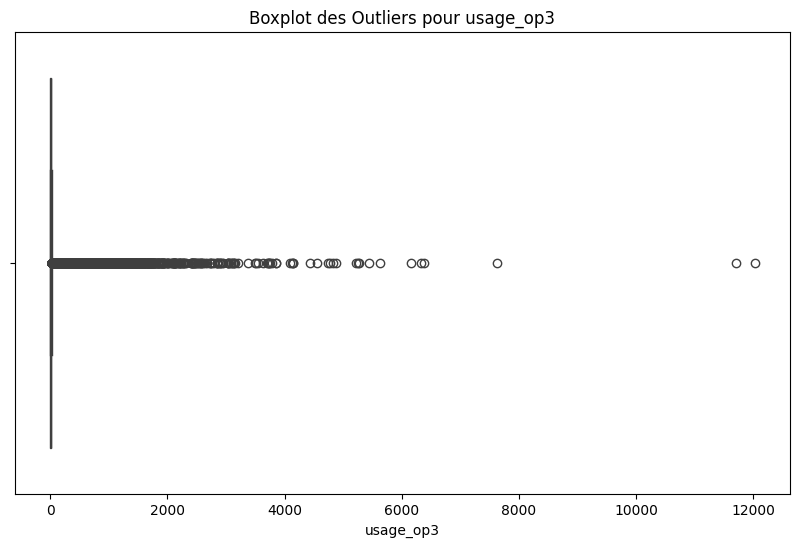

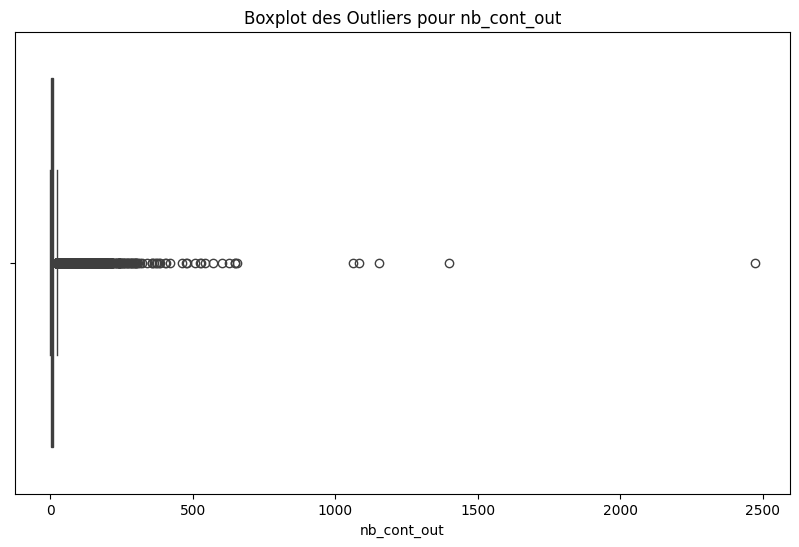

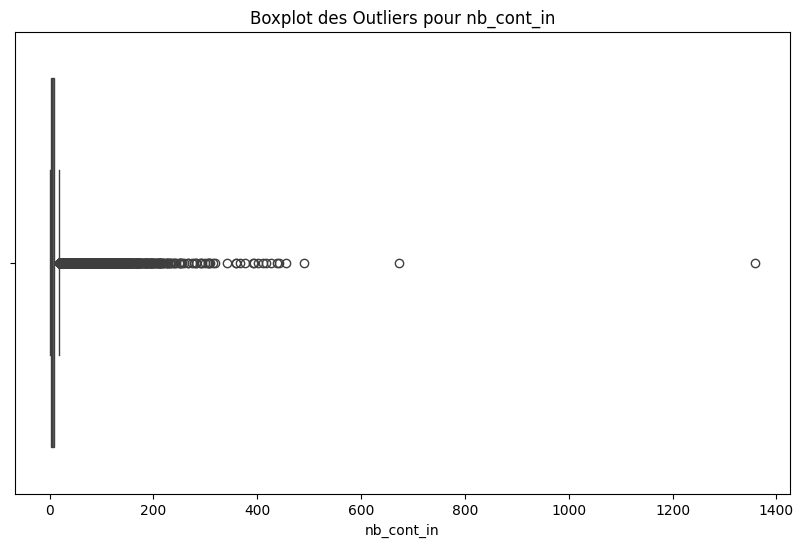

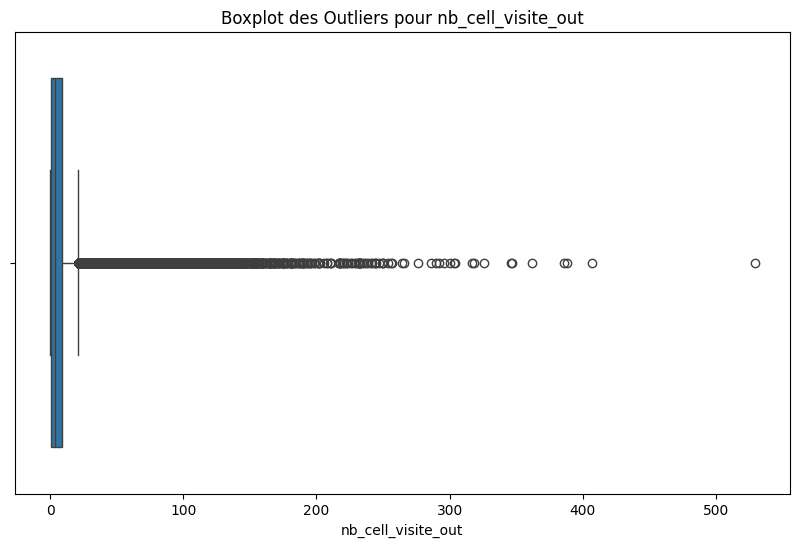

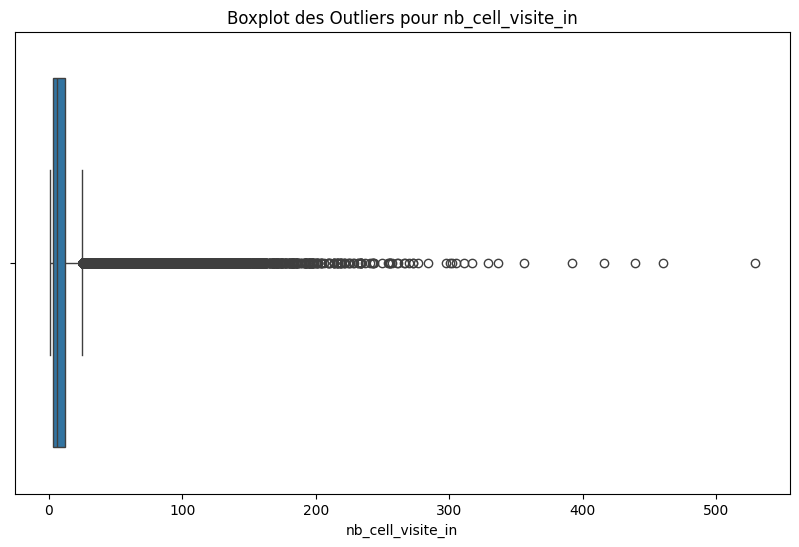

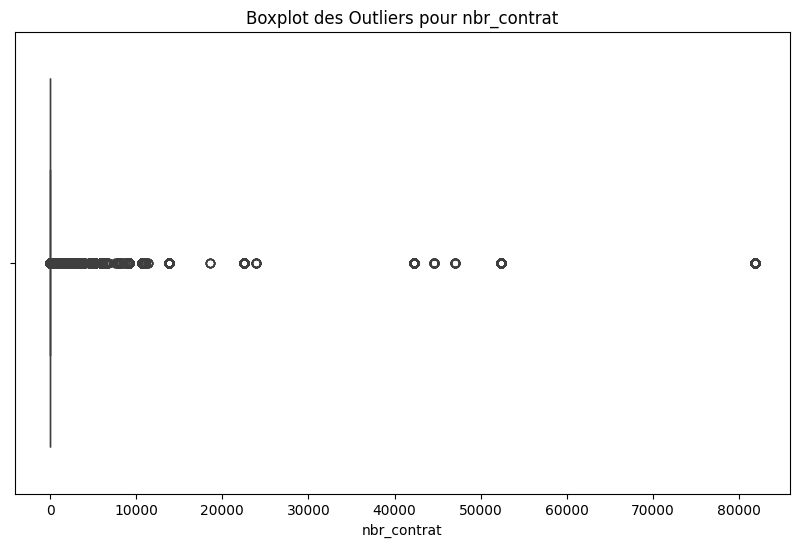

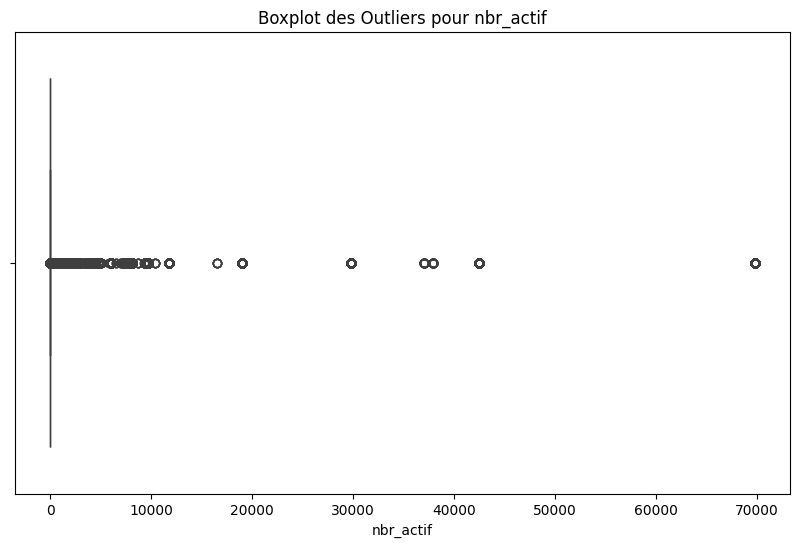

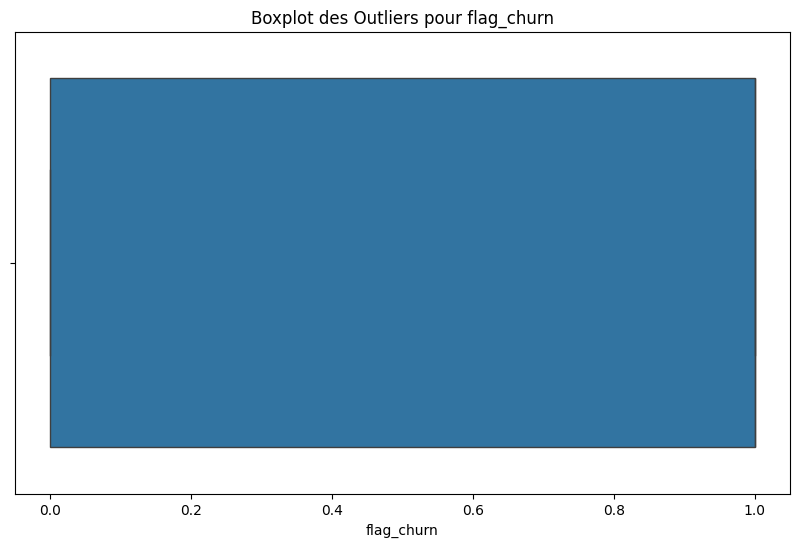

In [28]:
def plot_individual_boxplots(df):
    # Sélectionner uniquement les colonnes continues (numériques)
    df_continuous = df.select_dtypes(include=['float64', 'int64'])

    # Créer un boxplot pour chaque variable continue
    for column in df_continuous.columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df, x=column)
        plt.title(f'Boxplot des Outliers pour {column}')
        plt.show()

# Appeler la fonction sur votre DataFrame (data_copy par exemple)
plot_individual_boxplots(data_copy)

Détection des outliers avec IQR :

In [26]:
# Fonction pour détecter les outliers avec IQR
def detect_outliers_iqr(df, columns):
    outliers = {}
    for column in columns:
        # Calcul de Q1 (25e percentile) et Q3 (75e percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Calcul des limites inférieure et supérieure
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Détection des outliers
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    return outliers

# Appliquer la fonction sur les variables continues
columns_continues = ['total_nb_recharge', 'total_rechage', 'total_u_data', 'total_u_out', 'total_u_in', 
                     'total_rev_option', 'usage_op3', 'nb_cont_out', 'nb_cont_in', 
                     'nb_cell_visite_out', 'nb_cell_visite_in', 'nbr_contrat', 'nbr_actif']
outliers_iqr = detect_outliers_iqr(data_copy, columns_continues)

# Affichage des outliers détectés
for column, outlier_data in outliers_iqr.items():
    print(f"Outliers dans {column}:")
    print(outlier_data)
    print("\n")


Outliers dans total_nb_recharge:
           activation_date  total_nb_recharge  total_rechage  total_u_data  \
4      2022-11-01 17:58:57               11.0      31.000000  1.270596e+07   
9      2022-11-06 09:42:06                9.0      17.000000  4.620329e+06   
14     2022-11-03 16:08:16               14.0      14.000000  9.024111e+06   
19     2022-11-01 13:04:20               12.0      55.878000  3.133318e+06   
28     2022-11-01 14:05:28               12.0      82.143001  8.109294e+07   
...                    ...                ...            ...           ...   
708766 2023-02-06 10:33:26                9.0      48.000000  1.802091e+07   
708784 2023-02-06 15:32:13                8.0     145.000000  1.077734e+08   
708789 2023-02-16 11:01:09               10.0      55.000000  1.868974e+07   
708830 2023-02-03 11:01:35               19.0      22.400000  4.179539e+06   
708880 2023-02-14 16:54:14               14.0      14.000000  3.351376e+06   

        total_rev_option  tota

Traitement des outliers